# 1. Limpieza y ordenación de datos de Ventas de consolas desde 1994 hasta 2024

In [44]:
import numpy as np
import pandas as pd

In [45]:
df_ConVen = pd.read_csv("../data/ConsolasVendidas.csv", sep = ";")
display(df_ConVen)

,Pos,Platform,North America,Europe,Japan,Rest of World,Global
0,1,PlayStation 2 (PS2),53.65,55.28,23.18,27.90,160.01
1,2,Nintendo DS (DS),57.92,51.84,32.99,11.28,154.02
2,3,Nintendo Switch (NS),53.49,39.36,36.32,23.56,152.72
3,4,Game Boy (GB),43.18,40.05,32.47,2.99,118.69
4,5,PlayStation 4 (PS4),38.12,45.86,9.68,23.53,117.20
...,...,...,...,...,...,...,...
77,78,Tandy Video Information System (VIS),0.01,NaN,NaN,NaN,0.01
78,79,HyperScan (HS),NaN,NaN,NaN,NaN,0.01
79,80,Adventure Vision (AV),0.01,NaN,NaN,NaN,0.01
80,81,Palmtex Portable Videogame System (PVS),0.01,NaN,NaN,NaN,0.01


In [46]:
df_ConVen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pos            82 non-null     int64  
 1   Platform       82 non-null     object 
 2   North America  42 non-null     float64
 3   Europe         33 non-null     float64
 4   Japan          43 non-null     float64
 5   Rest of World  32 non-null     float64
 6   Global         82 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 4.6+ KB


In [47]:
empresa_map = {
    #(≈ 1993–2000)
    "PlayStation (PS)": "Sony",
    "Nintendo 64 (N64)": "Nintendo",

    #(≈ 1998–2006)
    "PlayStation 2 (PS2)": "Sony",
    "GameCube (GC)": "Nintendo",
    "Xbox (XB)": "Microsoft",
    "PlayStation Portable (PSP)": "Sony",

    #(≈ 2005–2013)
    "PlayStation 3 (PS3)": "Sony",
    "Xbox 360 (X360)": "Microsoft",
    "Nintendo Wii (Wii)": "Nintendo",
    "Nintendo DS (DS)" : "Nintendo",

    #(≈ 2012–2020)
    "PlayStation 4 (PS4)": "Sony",
    "Xbox One (XOne)": "Microsoft",
    "Nintendo Wii U (WiiU)": "Nintendo",
    "Nintendo 3DS (3DS)": "Nintendo",
    "PlayStation Vita (PSV)": "Sony",

    #(≈ 2020– )
    "PlayStation 5 (PS5)": "Sony",
    "Xbox Series X/S (XS)": "Microsoft",
    "Nintendo Switch (NS)": "Nintendo",
    "Nintendo Switch 2 (NS2)" : "Nintendo"
}

df_ConVen["Company"] = df_ConVen["Platform"].map(empresa_map)


In [48]:
display(df_ConVen)

,Pos,Platform,North America,Europe,Japan,Rest of World,Global,Company
0,1,PlayStation 2 (PS2),53.65,55.28,23.18,27.90,160.01,Sony
1,2,Nintendo DS (DS),57.92,51.84,32.99,11.28,154.02,Nintendo
2,3,Nintendo Switch (NS),53.49,39.36,36.32,23.56,152.72,Nintendo
3,4,Game Boy (GB),43.18,40.05,32.47,2.99,118.69,NaN
4,5,PlayStation 4 (PS4),38.12,45.86,9.68,23.53,117.20,Sony
...,...,...,...,...,...,...,...,...
77,78,Tandy Video Information System (VIS),0.01,NaN,NaN,NaN,0.01,NaN
78,79,HyperScan (HS),NaN,NaN,NaN,NaN,0.01,NaN
79,80,Adventure Vision (AV),0.01,NaN,NaN,NaN,0.01,NaN
80,81,Palmtex Portable Videogame System (PVS),0.01,NaN,NaN,NaN,0.01,NaN


In [49]:
df_ConVen_limpio = df_ConVen.dropna()
display(df_ConVen_limpio)

,Pos,Platform,North America,Europe,Japan,Rest of World,Global,Company
0,1,PlayStation 2 (PS2),53.65,55.28,23.18,27.90,160.01,Sony
1,2,Nintendo DS (DS),57.92,51.84,32.99,11.28,154.02,Nintendo
2,3,Nintendo Switch (NS),53.49,39.36,36.32,23.56,152.72,Nintendo
4,5,PlayStation 4 (PS4),38.12,45.86,9.68,23.53,117.20,Sony
5,6,PlayStation (PS),40.78,31.09,21.59,9.04,102.49,Sony
6,7,Nintendo Wii (Wii),45.51,33.12,12.77,10.23,101.63,Nintendo
7,8,PlayStation 3 (PS3),29.60,30.87,10.47,16.47,87.40,Sony
8,9,PlayStation 5 (PS5),30.58,30.44,7.22,17.89,86.12,Sony
9,10,Xbox 360 (X360),46.14,25.08,1.66,12.85,85.73,Microsoft
10,11,PlayStation Portable (PSP),21.62,25.31,20.02,15.57,82.52,Sony


In [50]:
year_map = {
    #(≈ 1993–2000)
    "PlayStation (PS)": 1994,
    "Nintendo 64 (N64)": 1996,

    #(≈ 1998–2006)
    "PlayStation 2 (PS2)": 2000,
    "GameCube (GC)": 2001,
    "Xbox (XB)": 2001,
    "PlayStation Portable (PSP)": 2004,

    #(≈ 2005–2013)
    "PlayStation 3 (PS3)": 2006,
    "Xbox 360 (X360)": 2005,
    "Nintendo Wii (Wii)": 2006,
    "Nintendo DS (DS)" : 2004,
    
    #(≈ 2012–2020)
    "PlayStation 4 (PS4)": 2013,
    "Xbox One (XOne)": 2013,
    "Nintendo Wii U (WiiU)": 2012,
    "Nintendo 3DS (3DS)": 2011,
    "PlayStation Vita (PSV)": 2011,

    #(≈ 2020– )
    "PlayStation 5 (PS5)": 2020,
    "Xbox Series X/S (XS)": 2020,
    "Nintendo Switch (NS)": 2017,
    "Nintendo Switch 2 (NS2)" : 2024
}

df_ConVen_limpio["Year_of_Release"] = df_ConVen_limpio["Platform"].map(year_map)
display(df_ConVen_limpio)


C:\Users\ChechuW10\AppData\Local\Temp\ipykernel_19140\2090692062.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ConVen_limpio["Year_of_Release"] = df_ConVen_limpio["Platform"].map(year_map)


,Pos,Platform,North America,Europe,Japan,Rest of World,Global,Company,Year_of_Release
0,1,PlayStation 2 (PS2),53.65,55.28,23.18,27.90,160.01,Sony,2000
1,2,Nintendo DS (DS),57.92,51.84,32.99,11.28,154.02,Nintendo,2004
2,3,Nintendo Switch (NS),53.49,39.36,36.32,23.56,152.72,Nintendo,2017
4,5,PlayStation 4 (PS4),38.12,45.86,9.68,23.53,117.20,Sony,2013
5,6,PlayStation (PS),40.78,31.09,21.59,9.04,102.49,Sony,1994
6,7,Nintendo Wii (Wii),45.51,33.12,12.77,10.23,101.63,Nintendo,2006
7,8,PlayStation 3 (PS3),29.60,30.87,10.47,16.47,87.40,Sony,2006
8,9,PlayStation 5 (PS5),30.58,30.44,7.22,17.89,86.12,Sony,2020
9,10,Xbox 360 (X360),46.14,25.08,1.66,12.85,85.73,Microsoft,2005
10,11,PlayStation Portable (PSP),21.62,25.31,20.02,15.57,82.52,Sony,2004


In [51]:
type_map = {

    #(≈ 1993–2000)
    "PlayStation (PS)": "Home Console",
    "Nintendo 64 (N64)": "Home Console",
    

    #(≈ 1998–2006)
    "PlayStation 2 (PS2)": "Home Console",
    "Xbox (XB)": "Home Console",
    "GameCube (GC)": "Home Console",
    "PlayStation Portable (PSP)": "Handheld",

    #(≈ 2005–2013)
    "PlayStation 3 (PS3)": "Home Console",
    "Xbox 360 (X360)": "Home Console",
    "Nintendo Wii (Wii)": "Home Console",
    "Nintendo DS (DS)" : "Handheld",

    #(≈ 2012–2020)
    "PlayStation 4 (PS4)": "Home Console",
    "Xbox One (XOne)": "Home Console",
    "Nintendo Wii U (WiiU)": "Home Console",
    "Nintendo 3DS (3DS)": "Handheld",
    "PlayStation Vita (PSV)": "Handheld",

    #(≈ 2020– )
    "PlayStation 5 (PS5)": "Home Console",
    "Xbox Series X/S (XS)": "Home Console",
    "Nintendo Switch (NS)": "Hybrid",
    "Nintendo Switch 2 (NS2)" : "Hybrid"
}

df_ConVen_limpio["Type"] = df_ConVen_limpio["Platform"].map(type_map)
display(df_ConVen_limpio)

C:\Users\ChechuW10\AppData\Local\Temp\ipykernel_19140\2694071458.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ConVen_limpio["Type"] = df_ConVen_limpio["Platform"].map(type_map)


,Pos,Platform,North America,Europe,Japan,Rest of World,Global,Company,Year_of_Release,Type
0,1,PlayStation 2 (PS2),53.65,55.28,23.18,27.90,160.01,Sony,2000,Home Console
1,2,Nintendo DS (DS),57.92,51.84,32.99,11.28,154.02,Nintendo,2004,Handheld
2,3,Nintendo Switch (NS),53.49,39.36,36.32,23.56,152.72,Nintendo,2017,Hybrid
4,5,PlayStation 4 (PS4),38.12,45.86,9.68,23.53,117.20,Sony,2013,Home Console
5,6,PlayStation (PS),40.78,31.09,21.59,9.04,102.49,Sony,1994,Home Console
6,7,Nintendo Wii (Wii),45.51,33.12,12.77,10.23,101.63,Nintendo,2006,Home Console
7,8,PlayStation 3 (PS3),29.60,30.87,10.47,16.47,87.40,Sony,2006,Home Console
8,9,PlayStation 5 (PS5),30.58,30.44,7.22,17.89,86.12,Sony,2020,Home Console
9,10,Xbox 360 (X360),46.14,25.08,1.66,12.85,85.73,Microsoft,2005,Home Console
10,11,PlayStation Portable (PSP),21.62,25.31,20.02,15.57,82.52,Sony,2004,Handheld


In [52]:
generation_map = {
    # 5ª Generación (≈ 1993–2000)
    "PlayStation (PS)": "5th Gen",
    "Nintendo 64 (N64)": "5th Gen",

    # 6ª Generación (≈ 1998–2006)
    "PlayStation 2 (PS2)": "6th Gen",
    "GameCube (GC)": "6th Gen",
    "Xbox (XB)": "6th Gen",
    "PlayStation Portable (PSP)": "6th Gen",

    # 7ª Generación (≈ 2005–2013)
    "PlayStation 3 (PS3)": "7th Gen",
    "Xbox 360 (X360)": "7th Gen",
    "Nintendo Wii (Wii)": "7th Gen",
    "Nintendo DS (DS)": "7th Gen",

    # 8ª Generación (≈ 2012–2020)
    "PlayStation 4 (PS4)": "8th Gen",
    "Xbox One (XOne)": "8th Gen",
    "Nintendo Wii U (WiiU)": "8th Gen",
    "Nintendo 3DS (3DS)": "8th Gen",
    "PlayStation Vita (PSV)": "8th Gen",

    # 8ª / 9ª Generación híbrida
    "Nintendo Switch (NS)": "8th Gen",

    # 9ª Generación (≈ 2020– )
    "PlayStation 5 (PS5)": "9th Gen",
    "Xbox Series X/S (XS)": "9th Gen",
    "Nintendo Switch 2 (NS2)" : "9th Gen"
}

df_ConVen_limpio["Generation"] = df_ConVen_limpio["Platform"].map(generation_map)

df_ConVen_limpio["Generation"].value_counts(dropna=False)

C:\Users\ChechuW10\AppData\Local\Temp\ipykernel_19140\2149491006.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ConVen_limpio["Generation"] = df_ConVen_limpio["Platform"].map(generation_map)


Generation
8th Gen    6
6th Gen    4
7th Gen    4
9th Gen    3
5th Gen    2
Name: count, dtype: int64

In [53]:
df_ConVen_limpio.set_index("Pos", inplace = True)
display(df_ConVen_limpio)

,Platform,North America,Europe,Japan,Rest of World,Global,Company,Year_of_Release,Type,Generation
Pos,,,,,,,,,,
1,PlayStation 2 (PS2),53.65,55.28,23.18,27.90,160.01,Sony,2000,Home Console,6th Gen
2,Nintendo DS (DS),57.92,51.84,32.99,11.28,154.02,Nintendo,2004,Handheld,7th Gen
3,Nintendo Switch (NS),53.49,39.36,36.32,23.56,152.72,Nintendo,2017,Hybrid,8th Gen
5,PlayStation 4 (PS4),38.12,45.86,9.68,23.53,117.20,Sony,2013,Home Console,8th Gen
6,PlayStation (PS),40.78,31.09,21.59,9.04,102.49,Sony,1994,Home Console,5th Gen
7,Nintendo Wii (Wii),45.51,33.12,12.77,10.23,101.63,Nintendo,2006,Home Console,7th Gen
8,PlayStation 3 (PS3),29.60,30.87,10.47,16.47,87.40,Sony,2006,Home Console,7th Gen
9,PlayStation 5 (PS5),30.58,30.44,7.22,17.89,86.12,Sony,2020,Home Console,9th Gen
10,Xbox 360 (X360),46.14,25.08,1.66,12.85,85.73,Microsoft,2005,Home Console,7th Gen


In [54]:
df_ConVen_limpio.to_csv(
    "consolas_vendidas_limpio.csv",
    sep=";",
    index=True,
    encoding="utf-8",
    decimal = "."
)

# Para leerlo la próxima vez, habrá que hacerlo con la siguiente línea de código:
# df = pd.read_csv("../data/consolas_vendidas_limpio.csv", sep=";", index_col=0)


# 2. Limpieza y ordenación de datos de ventas de videojuegos

In [3]:
import numpy as np
import pandas as pd

In [ ]:
#Archivo obtenido de https://www.kaggle.com/datasets/lamskdna/video-games-sales/data
df_VidJueVen1 = pd.read_excel("../data/VideoGames_Sales.xlsx")
display(df_VidJueVen1.head(10))

,title,console,genre,publisher,developer,critic_score,total_sales(mil),na_sales(mil),jp_sales(mil),pal_sales(mil),other_sales(mil),release_date
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06
5,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,Infinity Ward,8.7,14.82,9.07,0.13,4.29,1.33,2011-11-08
6,Call of Duty: Black Ops,X360,Shooter,Activision,Treyarch,8.8,14.74,9.76,0.11,3.73,1.14,2010-11-09
7,Red Dead Redemption 2,PS4,Action-Adventure,Rockstar Games,Rockstar Games,9.8,13.94,5.26,0.21,6.21,2.26,2018-10-26
8,Call of Duty: Black Ops II,X360,Shooter,Activision,Treyarch,8.4,13.86,8.27,0.07,4.32,1.20,2012-11-13
9,Call of Duty: Black Ops II,PS3,Shooter,Activision,Treyarch,8.0,13.80,4.99,0.65,5.88,2.28,2012-11-13


In [ ]:
#Archivo obtenido de https://www.kaggle.com/datasets/gregorut/videogamesales
df_VidJueVen2 = pd.read_csv("../data/vgsales.csv", encoding="latin-1")
display(df_VidJueVen2.head(10))

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [ ]:
#Archivo obtenido de https://openbigdata.org/resource/video-game-sales/
df_VidJueVen3 = pd.read_csv("../data/vgsales.csv__100lines.csv", encoding="latin-1")
display(df_VidJueVen3.head(10))

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [ ]:
#archivo obtenido de https://www.kaggle.com/datasets/zahidmughal2343/video-games-sale
df_VidJueVen4 = pd.read_csv("../data/video games sales.csv", encoding="latin-1")
display(df_VidJueVen4.head(10))

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


Parece que los datos coinciden o aparentan similitud entre los dataframes df_VidJueVen2, df_VidJueVen3 y df_VidJueVen4.<br> 
Haremos comparaciones entre ellos

In [8]:
print(df_VidJueVen2.equals(df_VidJueVen3))
print(df_VidJueVen2.equals(df_VidJueVen4))
print(df_VidJueVen3.equals(df_VidJueVen4))

False
True
False


df_VidJueVen2 y df_VidJueVen4 son el mismo, descartamos df_VidJueVen4 y diferenciamos entre df_VidJueVen2 y df_VidJueVen3:

In [9]:
df_VidJueVen2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [10]:
df_VidJueVen3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          100 non-null    int64  
 1   Name          100 non-null    object 
 2   Platform      100 non-null    object 
 3   Year          100 non-null    int64  
 4   Genre         100 non-null    object 
 5   Publisher     100 non-null    object 
 6   NA_Sales      100 non-null    float64
 7   EU_Sales      100 non-null    float64
 8   JP_Sales      100 non-null    float64
 9   Other_Sales   100 non-null    float64
 10  Global_Sales  100 non-null    float64
dtypes: float64(5), int64(2), object(4)
memory usage: 8.7+ KB


- Comparten columnas clave
- El DataFrame pequeño (df_VidJueVen3) podría estar completamente contenido en el grande (df_VidJueVen2)
- El objetivo es verificarlo y detectar discrepancias

In [11]:
#Pasamos a normalizar los tipos de las columnas de Year a Int: 
df_VidJueVen2["Year"] = df_VidJueVen2["Year"].astype("Int64")
df_VidJueVen3["Year"] = df_VidJueVen3["Year"].astype("Int64")
# Esto:
# Permite valores nulos
# Mantiene semántica de año
# Evita problemas en merges
print(df_VidJueVen2.dtypes)
print()
print(df_VidJueVen3.dtypes)

Rank              int64
Name             object
Platform         object
Year              Int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

Rank              int64
Name             object
Platform         object
Year              Int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


In [12]:
#Para comparar correctamente estos datasets, vamos a tener que hacerlo por columnas clave:
claves = ["Name", "Platform", "Year"]
#Esto identifica unívocamente un videojuego en un contexto histórico razonable.

#¿df_VidJueVen3 está contenido en df_VidJueVen2?
df_check = df_VidJueVen3.merge(
    df_VidJueVen2,
    on=claves, # on claves comunes
    how="left", # left para ver qué falta
    indicator=True, # True para ver el origen de cada fila
    suffixes=("_small", "_big") # small y big para diferenciar los datasets
)
#¿Hay registros de df_VidJueVen3 que NO estén en df_VidJueVen2?
df_check[df_check["_merge"] == "left_only"]  #_merge indica el origen de cada fila

,Rank_small,Name,Platform,Year,Genre_small,Publisher_small,NA_Sales_small,EU_Sales_small,JP_Sales_small,Other_Sales_small,Global_Sales_small,Rank_big,Genre_big,Publisher_big,NA_Sales_big,EU_Sales_big,JP_Sales_big,Other_Sales_big,Global_Sales_big,_merge


Se puede decir que df_VidJueVen3 es subconjunto de df_VidJueVen2 ya que no df_check no ha devuelto ningún registro que no esté. 
<br>Pero haremos comparaciones de valores de ventas para comprobar coherencia numérica: 

In [13]:
def comparacionVentas(nombCol : str):

    diff_ventas = (
        df_check[nombCol + "_small"] - df_check[nombCol + "_big"]
    ).abs()

    print(diff_ventas.describe())

In [14]:
print("Ventas Globales (Global_Sales):")
comparacionVentas("Global_Sales")

print("\nVentas en Norte America (NA_Sales):")
comparacionVentas("NA_Sales")

print("\nVentas en Europa (EU_Sales):")
comparacionVentas("EU_Sales")

print("\nVentas en Japón (JP_Sales):")
comparacionVentas("JP_Sales")

print("\nVentas en Otros países (Other_Sales):")
comparacionVentas("Other_Sales")

Ventas Globales (Global_Sales):
count    100.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64

Ventas en Norte America (NA_Sales):
count    100.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64

Ventas en Europa (EU_Sales):
count    100.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64

Ventas en Japón (JP_Sales):
count    100.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64

Ventas en Otros países (Other_Sales):
count    100.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64


Con esto terminamos de confirmar que, efectivamente, df_VidJueVen3 es subconjunto de df_VidJueVen2.<br>
Así que descartamos el uso de df_VidJueVen3.

Quedaría comparar df_VidJueVen1 con df_VidJueVen2 y poder obtener un DataFrame final con todos los datos reunidos y lo más completo posible.

In [15]:
df_VidJueVen1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             64016 non-null  object        
 1   console           64016 non-null  object        
 2   genre             64016 non-null  object        
 3   publisher         64016 non-null  object        
 4   developer         63999 non-null  object        
 5   critic_score      6678 non-null   float64       
 6   total_sales(mil)  18922 non-null  float64       
 7   na_sales(mil)     12637 non-null  float64       
 8   jp_sales(mil)     6726 non-null   float64       
 9   pal_sales(mil)    12824 non-null  float64       
 10  other_sales(mil)  15128 non-null  float64       
 11  release_date      56965 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 5.9+ MB


Este es, efectivamente, el caso más complejo y más interesante: comparar dos fuentes distintas que describen el mismo fenómeno,<br> 
pero con modelos de datos diferentes. 
<br>Aquí ya no estamos hablando solo de “comparar”, sino de integración y reconciliación de dos fuentes heterogéneas para construir un dataset canónico.



### Enfoque conceptual (clave antes del código)

Objetivo:
- Restringir ambos DataFrames al mismo dominio temporal (1994–2024)

- Restringir al mismo dominio de plataformas (Nintendo, Sony, Microsoft)

- Homogeneizar esquema y semántica

- Fusionar ambas fuentes para maximizar cobertura de datos

- Conservar trazabilidad del origen

In [16]:
#Paso 1: Criba temporal (1994 - 2024)
df1 = df_VidJueVen1[
    df_VidJueVen1["release_date"].dt.year.between(1994, 2024)
].copy()

df2 = df_VidJueVen2[
    df_VidJueVen2["Year"].between(1994, 2024)
].copy()

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51546 entries, 0 to 64014
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             51546 non-null  object        
 1   console           51546 non-null  object        
 2   genre             51546 non-null  object        
 3   publisher         51546 non-null  object        
 4   developer         51535 non-null  object        
 5   critic_score      6605 non-null   float64       
 6   total_sales(mil)  18584 non-null  float64       
 7   na_sales(mil)     12462 non-null  float64       
 8   jp_sales(mil)     6576 non-null   float64       
 9   pal_sales(mil)    12622 non-null  float64       
 10  other_sales(mil)  14880 non-null  float64       
 11  release_date      51546 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 5.1+ MB


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15962 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          15962 non-null  int64  
 1   Name          15962 non-null  object 
 2   Platform      15962 non-null  object 
 3   Year          15962 non-null  Int64  
 4   Genre         15962 non-null  object 
 5   Publisher     15926 non-null  object 
 6   NA_Sales      15962 non-null  float64
 7   EU_Sales      15962 non-null  float64
 8   JP_Sales      15962 non-null  float64
 9   Other_Sales   15962 non-null  float64
 10  Global_Sales  15962 non-null  float64
dtypes: Int64(1), float64(5), int64(1), object(4)
memory usage: 1.5+ MB


In [19]:
#Paso 2: Criba por consolas relevantes

platform_map = {
    # Sony
    "PS": "PlayStation",
    "PS2": "PlayStation 2",
    "PS3": "PlayStation 3",
    "PS4": "PlayStation 4",
    "PS5": "PlayStation 5",
    "PlayStation": "PlayStation",
    "PlayStation 2": "PlayStation 2",
    "PlayStation 3": "PlayStation 3",
    "PlayStation 4": "PlayStation 4",
    "PlayStation 5": "PlayStation 5",
    "PSP":"PlayStation Portable",
    "PSV": "PlayStation Vita",
    "PlayStation Portable": "PlayStation Portable",
    "PlayStation Vita": "PlayStation Vita",
    

    # Microsoft
    "XB": "Xbox",
    "X360": "Xbox 360",
    "XOne": "Xbox One",
    "XS": "Xbox Series X/S",
    "Xbox": "Xbox",
    "Xbox 360": "Xbox 360",
    "Xbox One": "Xbox One",
    "Xbox Series X/S": "Xbox Series X/S",

    # Nintendo
    "N64": "Nintendo 64",
    "GC": "GameCube",
    "Wii": "Wii",
    "WiiU": "Wii U",
    "Switch": "Switch",
    "NS": "Switch",
    "DS": "Nintendo DS",
    "3DS": "Nintendo 3DS",
    "Nintendo 64": "Nintendo 64",
    "GameCube": "GameCube",
    "Wii U": "Wii U",
    "Nintendo DS": "Nintendo DS",
    "Nintendo 3DS": "Nintendo 3DS"
}

#Aplicamos una normalización:
df1["Platform_norm"] = df1["console"].map(platform_map)
df2["Platform_norm"] = df2["Platform"].map(platform_map)

#Y filtramos solo las válidas:
valid_platforms = set(platform_map.values()) # la función set() crea un conjunto de valores únicos en forma de lista y lo utilizaremos para filtrar

df1 = df1[df1["Platform_norm"].isin(valid_platforms)]
df2 = df2[df2["Platform_norm"].isin(valid_platforms)]

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25958 entries, 0 to 64014
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             25958 non-null  object        
 1   console           25958 non-null  object        
 2   genre             25958 non-null  object        
 3   publisher         25958 non-null  object        
 4   developer         25955 non-null  object        
 5   critic_score      4109 non-null   float64       
 6   total_sales(mil)  15652 non-null  float64       
 7   na_sales(mil)     11223 non-null  float64       
 8   jp_sales(mil)     5987 non-null   float64       
 9   pal_sales(mil)    10283 non-null  float64       
 10  other_sales(mil)  12306 non-null  float64       
 11  release_date      25958 non-null  datetime64[ns]
 12  Platform_norm     25958 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(6)
memory usage: 2.8+ MB


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13739 entries, 0 to 16596
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           13739 non-null  int64  
 1   Name           13739 non-null  object 
 2   Platform       13739 non-null  object 
 3   Year           13739 non-null  Int64  
 4   Genre          13739 non-null  object 
 5   Publisher      13733 non-null  object 
 6   NA_Sales       13739 non-null  float64
 7   EU_Sales       13739 non-null  float64
 8   JP_Sales       13739 non-null  float64
 9   Other_Sales    13739 non-null  float64
 10  Global_Sales   13739 non-null  float64
 11  Platform_norm  13739 non-null  object 
dtypes: Int64(1), float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [22]:
#Paso 3: Homogeneizar las columnas clave
df1["Year"] = df1["release_date"].dt.year

# Renombramos columnas para alinear semántica:
df1 = df1.rename(columns={
    "title": "Name",
    "genre": "Genre",
    "publisher": "Publisher",
    "total_sales(mil)": "Global_Sales",
    "na_sales(mil)": "NA_Sales",
    "jp_sales(mil)": "JP_Sales",
    "pal_sales(mil)": "EU_Sales",
    "other_sales(mil)": "Other_Sales"
})


In [23]:
display(df1.head())

,Name,console,Genre,Publisher,developer,critic_score,Global_Sales,NA_Sales,JP_Sales,EU_Sales,Other_Sales,release_date,Platform_norm,Year
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,PlayStation 3,2013
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,PlayStation 4,2014
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,PlayStation 2,2002
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,Xbox 360,2013
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,PlayStation 4,2015


In [24]:
#Paso 4: Seleccionamos columnas comunes y complementarias:

cols_common = [
    "Name", "Platform_norm", "Year",
    "Genre", "Publisher",
    "NA_Sales", "EU_Sales", "JP_Sales",
    "Other_Sales", "Global_Sales"
]

df1_sub = df1[cols_common + ["developer"]].copy() # Agregamos developer como columna complementaria
df2_sub = df2[cols_common].copy() # Solo columnas comunes


In [25]:
#Paso 5: Fusión de fuentes

df_final = df1_sub.merge(
    df2_sub,
    on=["Name", "Platform_norm", "Year"], # on claves comunes
    how="outer", # outer para no perder datos de ninguna fuente
    suffixes=("_src1", "_src2"), # sufijos para diferenciar columnas iguales
    indicator=True # para ver el origen de cada fila
)

In [26]:
#Paso 6: Consolidar columnas duplicadas

def consolidar_cols_duplic(nombCol : str):

    df_final[nombCol] = (
        df_final[nombCol + "_src1"].combine_first(
            df_final[nombCol + "_src2"]
            ) # Usamos combine_first para priorizar src1 sobre src2 ya que es más reciente y completa
    )

In [27]:
consolidar_cols_duplic("Global_Sales")
consolidar_cols_duplic("NA_Sales")
consolidar_cols_duplic("EU_Sales")
consolidar_cols_duplic("JP_Sales")
consolidar_cols_duplic("Other_Sales")

In [28]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28267 entries, 0 to 28266
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               28267 non-null  object  
 1   Platform_norm      28267 non-null  object  
 2   Year               28267 non-null  Int64   
 3   Genre_src1         25959 non-null  object  
 4   Publisher_src1     25959 non-null  object  
 5   NA_Sales_src1      11224 non-null  float64 
 6   EU_Sales_src1      10284 non-null  float64 
 7   JP_Sales_src1      5987 non-null   float64 
 8   Other_Sales_src1   12307 non-null  float64 
 9   Global_Sales_src1  15653 non-null  float64 
 10  developer          25956 non-null  object  
 11  Genre_src2         13785 non-null  object  
 12  Publisher_src2     13779 non-null  object  
 13  NA_Sales_src2      13785 non-null  float64 
 14  EU_Sales_src2      13785 non-null  float64 
 15  JP_Sales_src2      13785 non-null  float64 
 16  Othe

In [29]:
#Paso 7: Eliminamos las columnas temporales 

df_final = df_final.drop(
    columns=[col for col in df_final.columns if col.endswith("_src1") or col.endswith("_src2")]
)

df_final = df_final.drop(columns="_merge") #Esta columna solo indicaba el origen de las filas

df_final.columns

Index(['Name', 'Platform_norm', 'Year', 'developer', 'Global_Sales',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')

In [30]:
df_final.info()
display(df_final.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28267 entries, 0 to 28266
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           28267 non-null  object 
 1   Platform_norm  28267 non-null  object 
 2   Year           28267 non-null  Int64  
 3   developer      25956 non-null  object 
 4   Global_Sales   18526 non-null  float64
 5   NA_Sales       16700 non-null  float64
 6   EU_Sales       16365 non-null  float64
 7   JP_Sales       16061 non-null  float64
 8   Other_Sales    17185 non-null  float64
dtypes: Int64(1), float64(5), object(3)
memory usage: 2.0+ MB


,Name,Platform_norm,Year,developer,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,2048,Nintendo 3DS,2014,Ketchapp,NaN,NaN,NaN,NaN,NaN
1,#IDARB,Xbox One,2015,Other Ocean Interactive,NaN,NaN,NaN,NaN,NaN
2,#killallzombies,PlayStation 4,2015,Beatshapers,NaN,NaN,NaN,NaN,NaN
3,'70s Robot Anime: Geppy-X,PlayStation,1999,Aroma,NaN,NaN,NaN,NaN,NaN
4,'98 Koshien,PlayStation,1998,Magical Company,0.41,0.15,0.1,0.12,0.03


In [31]:
sales_cols = [
    "NA_Sales",
    "EU_Sales",
    "JP_Sales",
    "Other_Sales",
    "Global_Sales"
]

In [32]:
print(df_final[sales_cols]
      .isna()
      .all(axis=1)
      .sum()) # Filas sin datos de ventas

9741


In [33]:
#Paso 8: Limpiamos aquellos registros cuyas columnas de ventas estén todas vacías:

sales_cols = [
    "NA_Sales",
    "EU_Sales",
    "JP_Sales",
    "Other_Sales",
    "Global_Sales"
]

df_final = df_final.dropna(subset=sales_cols, how="all")

In [34]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18526 entries, 4 to 28266
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           18526 non-null  object 
 1   Platform_norm  18526 non-null  object 
 2   Year           18526 non-null  Int64  
 3   developer      16216 non-null  object 
 4   Global_Sales   18526 non-null  float64
 5   NA_Sales       16700 non-null  float64
 6   EU_Sales       16365 non-null  float64
 7   JP_Sales       16061 non-null  float64
 8   Other_Sales    17185 non-null  float64
dtypes: Int64(1), float64(5), object(3)
memory usage: 1.4+ MB


In [35]:
#Paso 9: Añadimos 0 en aquellas ventas por región para poder trabajar mejor con los datos

df_final[sales_cols] = df_final[sales_cols].fillna(0)

In [36]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18526 entries, 4 to 28266
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           18526 non-null  object 
 1   Platform_norm  18526 non-null  object 
 2   Year           18526 non-null  Int64  
 3   developer      16216 non-null  object 
 4   Global_Sales   18526 non-null  float64
 5   NA_Sales       18526 non-null  float64
 6   EU_Sales       18526 non-null  float64
 7   JP_Sales       18526 non-null  float64
 8   Other_Sales    18526 non-null  float64
dtypes: Int64(1), float64(5), object(3)
memory usage: 1.4+ MB


In [37]:
#Paso 10: Comprobamos si realmente las ventas globales de un juego son la suma de las ventas por regiones:
#∣(NA+EU+JP+Other)−Global∣

diff = (
    df_final["NA_Sales"]
    + df_final["EU_Sales"]
    + df_final["JP_Sales"]
    + df_final["Other_Sales"]
    - df_final["Global_Sales"]
).abs()

diff.describe() # Diferencias entre suma regional y ventas globales


count    18526.000000
mean         0.002734
std          0.007320
min          0.000000
25%          0.000000
50%          0.000000
75%          0.010000
max          0.490000
dtype: float64

- mean = 0.002734

    La discrepancia media es de ~0.0027 millones de unidades
    ≈ 2 700 copias

    Es prácticamente despreciable a escala de ventas globales.

    Indica:
    - redondeos
    - pequeñas diferencias entre fuentes
    - truncamientos a dos decimales


- std = 0.007320

    La desviación estándar es ~0.0073 millones
    ≈ 7 300 copias

    Esto refuerza que:

    - la mayoría de las discrepancias están muy cerca de 0
    - no hay ruido significativo sistemático

- min = 0.000000

    Hay muchísimos registros perfectamente coherentes:

    Global = suma exacta de regiones

    Esto suele ocurrir en juegos con:

    - cifras redondeadas de forma consistente

    - origen común de datos

- Percentiles (25%, 50%, 75%)

    - 50 % (mediana) = 0.000000

        - La mitad exacta de los juegos no tiene ninguna discrepancia

    - 75 % = 0.010000

        - El 75 % de los juegos tiene discrepancias ≤ 0.01 millones

        - Es decir, ≤ 10 000 unidades

    Este nivel de error es estadísticamente irrelevante para análisis macro.

- max = 0.490000

    Esta es la única cifra que merece atención.

    - 0.49 millones ≈ 490 000 unidades

    - Es un outlier claro

    No invalida el dataset, pero:

    - conviene localizar esos casos

    - entender su causa

### La conclusión técnica
- El dataset es internamente consistente
- Las discrepancias son mayoritariamente de redondeo
- No hay evidencia de errores sistemáticos

Inspeccionemos el outlier para entenderlo y documentarlo antes de pasar a recalcular la Global_Sales puesto que eliminaríamos cualquier discrepancia, perderíamos información sobre las incosistencias entre las fuentes y posibles errores reales.

In [38]:
#Identificamos los outliers:
outliers = df_final[diff > 0.1].copy() #> 0.1 millones de discrepancia


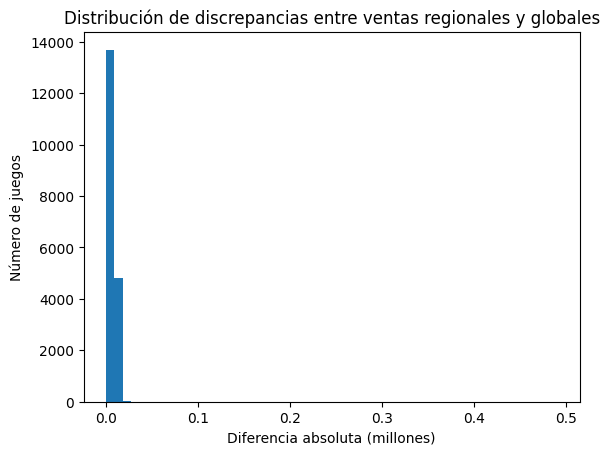

In [39]:
import matplotlib.pyplot as plt

#Utilizamos un diagrama de caja para visualizar los outliers:
plt.figure()
plt.hist(diff, bins=55)
plt.title("Distribución de discrepancias entre ventas regionales y globales")
plt.xlabel("Diferencia absoluta (millones)")
plt.ylabel("Número de juegos")
plt.show()


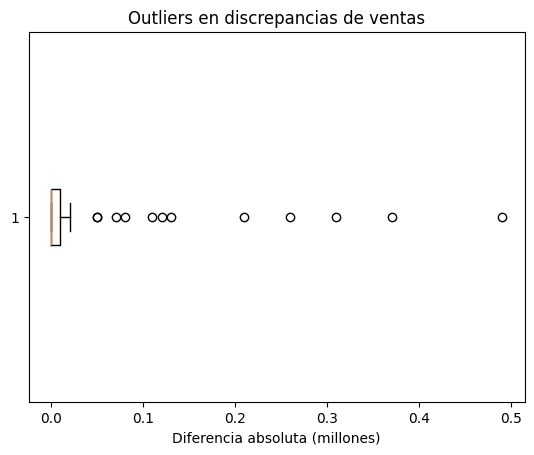

In [40]:
#Utilizamos un diagrama de caja para visualizar los outliers:
plt.figure()
plt.boxplot(
    diff, 
    vert=False
    )
plt.title("Outliers en discrepancias de ventas")
plt.xlabel("Diferencia absoluta (millones)")
plt.show()


In [41]:
#Inspección tabular de los outliers:
outliers[
    ["Name", "Platform_norm", "Year",
     "NA_Sales", "EU_Sales", "JP_Sales",
     "Other_Sales", "Global_Sales"]
].sort_values(by="Global_Sales", ascending=False)


,Name,Platform_norm,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
26765,WWE SmackDown! Shut Your Mouth,PlayStation 2,2002,1.32,1.29,0.04,0.38,2.66
5827,Dirge of Cerberus: Final Fantasy VII,PlayStation 2,2006,0.46,0.37,0.51,0.12,0.97
7805,Felony 11-79,PlayStation,1997,0.06,0.04,0.15,0.01,0.15
7359,F1 Championship Season 2000,PlayStation 2,2000,0.06,0.05,0.03,0.02,0.03
14295,Metal Gear Solid: Snake Eater 3D,Nintendo 3DS,2012,0.03,0.11,0.10,0.00,0.03
21017,Shin Megami Tensei: Devil Survivor Overclocked,Nintendo 3DS,2011,0.28,0.01,0.03,0.02,0.03
21253,Silent Hill: Book of Memories,PlayStation Vita,2012,0.13,0.01,0.00,0.00,0.02
22571,Starhawk,PlayStation 3,2012,0.18,0.05,0.02,0.03,0.02


Podemos observar de los resultados obtenidos anteriormente que la problemática de la incosistencia de estos datos se trata del origen de la métrica.

Analicemos por tipo de discrepancia.

- Caso A - Global claramente inferior a la suma regional:

    Ejemplo:

    - F1 Championship Season 2000<br>

        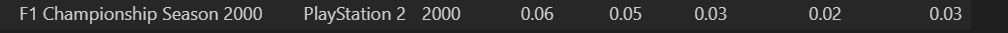
        - Regiones ≈ 0.16

        - Global = 0.03

    Esto no puede ser redondeo.

    Interpretación probable:

    - Global_Sales proviene de una fuente distinta

    - Puede representar:

        - solo ciertas regiones

        - una estimación conservadora

        - un subconjunto temporal

    - Las ventas regionales están más desglosadas y completas

    Se trata de inconsistencia de fuente, no de cálculo

<br>    

- Caso B - Global coincide con una sola región

    Ejemplo:

    - Metal Gear Solid: Snake Eater 3D
    <br>

    
    - JP + EU + NA ≈ 0.24

    - Global = 0.03

    Esto sugiere:

    - Global_Sales = ventas en una región concreta

    - o ventas iniciales

    - o datos parciales

    Global_Sales no es verdaderamente “global” en esta fuente

<br>

- Caso C - Global muy inferior pese a ventas regionales claras

    Ejemplo:

    - Shin Megami Tensei: Devil Survivor Overclocked

    <br>
    

    - NA = 0.28

    - Global = 0.03

    Aquí el conflicto es evidente:

    - No es redondeo

    - No es error puntual

    Es una definición distinta de “global”

<br>

- Caso D - Redondeo razonable (los menos problemáticos)

    Ejemplo:

    - WWE SmackDown! Shut Your Mouth
    <br>

    

    Aquí sí:

    - Global ≈ suma regional

    - Diferencia pequeña

    - Redondeo clásico

    Estos casos no son el problema.

A partir de esta inspección ya podemos afirmar:

    La columna Global_Sales no representa de forma consistente
    la suma de las ventas regionales en todas las fuentes integradas.

No se puede usar tal como está, habrá que recalcular a partir de la suma de regiones y tratar esta nueva columna como la métrica canónica para garantizar coherencia interna y comparabilidad entre generaciones y compañías.

In [42]:
df_final["Global_Sales"] = (
    df_final["NA_Sales"]
    + df_final["EU_Sales"]
    + df_final["JP_Sales"]
    + df_final["Other_Sales"]
)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18526 entries, 4 to 28266
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           18526 non-null  object 
 1   Platform_norm  18526 non-null  object 
 2   Year           18526 non-null  Int64  
 3   developer      16216 non-null  object 
 4   Global_Sales   18526 non-null  float64
 5   NA_Sales       18526 non-null  float64
 6   EU_Sales       18526 non-null  float64
 7   JP_Sales       18526 non-null  float64
 8   Other_Sales    18526 non-null  float64
dtypes: Int64(1), float64(5), object(3)
memory usage: 1.4+ MB


In [46]:
df_final = df_final.sort_values(by="Global_Sales", ascending=False)
df_final["Global_Sales"] = df_final["Global_Sales"].round(2)
display (df_final.head(20))

,Name,Platform_norm,Year,developer,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
27119,Wii Sports,Wii,2006,Nintendo EAD,82.74,41.49,29.02,3.77,8.46
13732,Mario Kart Wii,Wii,2008,Nintendo EAD,35.83,15.85,12.88,3.79,3.31
27121,Wii Sports Resort,Wii,2009,Nintendo EAD,33.00,15.75,11.01,3.28,2.96
16412,New Super Mario Bros.,Nintendo DS,2006,Nintendo EAD,30.01,11.38,9.23,6.50,2.90
27116,Wii Play,Wii,2006,NaN,29.01,14.03,9.20,2.93,2.85
16416,New Super Mario Bros. Wii,Wii,2009,Nintendo EAD,28.61,14.59,7.06,4.70,2.26
16609,Nintendogs,Nintendo DS,2005,Nintendo EAD,24.75,9.07,11.00,1.93,2.75
13729,Mario Kart DS,Nintendo DS,2005,Nintendo EAD,23.43,9.81,7.57,4.13,1.92
27107,Wii Fit,Wii,2007,NaN,22.72,8.94,8.03,3.60,2.15
27109,Wii Fit Plus,Wii,2009,Nintendo EAD,22.00,9.09,8.59,2.53,1.79


In [47]:
df_final.to_csv(
    "videojuegos_vendidos_limpio.csv",
    sep=";",
    index=True,
    encoding="utf-8",
    decimal = "."
)

Deberíamos pasar a añadir los datos columnas categóricas para poder hacer el análisis y las comparaciones añadiendo las columnas de "Generaciones", "Tipos de consolas" y "Empresa" para poder distinguir y agrupar los momentos y mercados.

In [ ]:
generation_map = {
    # 5ª Generación (≈ 1993–2000)
    "PlayStation": "5th Gen",
    "Nintendo 64": "5th Gen",

    # 6ª Generación (≈ 1998–2006)
    "PlayStation 2": "6th Gen",
    "GameCube": "6th Gen",
    "Xbox": "6th Gen",
    "PlayStation Portable": "6th Gen",

    # 7ª Generación (≈ 2005–2013)
    "PlayStation 3": "7th Gen",
    "Xbox 360": "7th Gen",
    "Wii": "7th Gen",
    "Nintendo DS": "7th Gen",

    # 8ª Generación (≈ 2012–2020)
    "PlayStation 4": "8th Gen",
    "Xbox One": "8th Gen",
    "Wii U": "8th Gen",
    "Nintendo 3DS": "8th Gen",
    "PlayStation Vita": "8th Gen",

    # 8ª / 9ª Generación híbrida
    "Switch": "8th Gen",

    # 9ª Generación (≈ 2020– )
    "PlayStation 5": "9th Gen",
    "Xbox Series X/S": "9th Gen"
}

df_final["Generation"] = df_final["Platform_norm"].map(generation_map)

df_final["Generation"].value_counts(dropna=False)

Generation
7th Gen    7395
6th Gen    5605
8th Gen    3620
5th Gen    1906
Name: count, dtype: int64

In [49]:
console_type_map = {
    # Sobremesa
    "PlayStation": "Home Console",
    "PlayStation 2": "Home Console",
    "PlayStation 3": "Home Console",
    "PlayStation 4": "Home Console",
    "PlayStation 5": "Home Console",
    "Xbox": "Home Console",
    "Xbox 360": "Home Console",
    "Xbox One": "Home Console",
    "Xbox Series X/S": "Home Console",
    "Nintendo 64": "Home Console",
    "GameCube": "Home Console",
    "Wii": "Home Console",
    "Wii U": "Home Console",

    # Portátiles
    "PlayStation Portable": "Handheld",
    "PlayStation Vita": "Handheld",
    "Nintendo DS": "Handheld",
    "Nintendo 3DS": "Handheld",

    # Híbrida
    "Switch": "Hybrid"
}

df_final["Console_Type"] = df_final["Platform_norm"].map(console_type_map)
df_final["Console_Type"].value_counts(dropna=False)

Console_Type
Home Console    12328
Handheld         5936
Hybrid            262
Name: count, dtype: int64

In [51]:
company_map = {
    # Sony
    "PlayStation": "Sony",
    "PlayStation 2": "Sony",
    "PlayStation 3": "Sony",
    "PlayStation 4": "Sony",
    "PlayStation 5": "Sony",
    "PlayStation Portable": "Sony",
    "PlayStation Vita": "Sony",

    # Microsoft
    "Xbox": "Microsoft",
    "Xbox 360": "Microsoft",
    "Xbox One": "Microsoft",
    "Xbox Series X/S": "Microsoft",

    # Nintendo
    "Nintendo 64": "Nintendo",
    "GameCube": "Nintendo",
    "Wii": "Nintendo",
    "Wii U": "Nintendo",
    "Switch": "Nintendo",
    "Nintendo DS": "Nintendo",
    "Nintendo 3DS": "Nintendo"
}
df_final["Company"] = df_final["Platform_norm"].map(company_map)
df_final["Company"].value_counts(dropna=False)


Company
Sony         9100
Nintendo     6498
Microsoft    2928
Name: count, dtype: int64

In [53]:
df_final.to_csv(
    "videojuegos_vendidos_limpio.csv",
    sep=";",
    index=True,
    encoding="utf-8",
    decimal = "."
)

# Limpieza de datos

Una vez añadidas las columnas categóricas y estructurados los datos, debemos hacer comprobaciones y limpiezas de estos para un correcto análisis. 

In [67]:
df_final_sorted = df_final.sort_values(
    by=["Name", "Platform_norm", "developer", "Year"],
    ascending=[True, True, False, True]
)
# False en Developer → valores no nulos primero
# True en Year → año más antiguo primero
display(df_final_sorted.head(20))

,Name,Platform_norm,Year,developer,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Generation,Console_Type,Company
4,'98 Koshien,PlayStation,1998,Magical Company,0.40,0.15,0.10,0.12,0.03,5th Gen,Home Console,Sony
8,.hack//G.U. Last Recode,PlayStation 4,2017,CyberConnect2,0.25,0.10,0.04,0.08,0.03,8th Gen,Home Console,Sony
9,.hack//G.U. Vol.1//Rebirth,PlayStation 2,2006,CyberConnect2,0.17,0.00,0.00,0.17,0.00,6th Gen,Home Console,Sony
11,.hack//G.U. Vol.2//Reminisce,PlayStation 2,2007,CyberConnect2,0.23,0.11,0.09,0.00,0.03,6th Gen,Home Console,Sony
10,.hack//G.U. Vol.2//Reminisce,PlayStation 2,2006,NaN,0.23,0.11,0.09,0.00,0.03,6th Gen,Home Console,Sony
13,.hack//G.U. Vol.2//Reminisce (jp sales),PlayStation 2,2007,CyberConnect2,0.16,0.00,0.00,0.16,0.00,6th Gen,Home Console,Sony
12,.hack//G.U. Vol.2//Reminisce (jp sales),PlayStation 2,2006,NaN,0.16,0.00,0.00,0.16,0.00,6th Gen,Home Console,Sony
14,.hack//G.U. Vol.3//Redemption,PlayStation 2,2007,CyberConnect2,0.17,0.00,0.00,0.17,0.00,6th Gen,Home Console,Sony
16,.hack//Infection Part 1,PlayStation 2,2003,CyberConnect2,1.26,0.49,0.38,0.26,0.13,6th Gen,Home Console,Sony
15,.hack//Infection Part 1,PlayStation 2,2002,NaN,1.26,0.49,0.38,0.26,0.13,6th Gen,Home Console,Sony


Podemos observar casos de duplicación de datos que cumplen el siguiente patrón:
- mismo nombre

- misma plataforma

- mismas ventas regionales y globales

- misma empresa / generación / tipo

- diferencias solo en:

    - Año (±1)

    - Desarrollador (NaN vs valor)

👉 Esto no es:

- un port (no cambia plataforma)

- un remaster (no cambia ventas ni plataforma)


- una edición distinta

Es claramente:

    el mismo producto, con metadatos inconsistentes entre fuentes

Debemos conservar un único registro, intentando priorizar aquellos que tengan el campo Developer no nulo y/o el año más antiguo (ya que representa el año verdadero de lanzamiento)

In [68]:
# Definimos las columnas clave de identidad del juego, usando las ventas regionales para evitar ambigüedades
id_cols = [
    "Name",
    "Platform_norm",
    "NA_Sales",
    "EU_Sales",
    "JP_Sales",
    "Other_Sales"
]

#Eliminamos duplicados basándonos en las columnas clave definidas anteriormente
df_final_dedup = df_final_sorted.drop_duplicates(
    subset=id_cols,
    keep="first"
).reset_index(drop=True)

display(df_final_dedup.head(20))

,Name,Platform_norm,Year,developer,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Generation,Console_Type,Company
0,'98 Koshien,PlayStation,1998,Magical Company,0.40,0.15,0.10,0.12,0.03,5th Gen,Home Console,Sony
1,.hack//G.U. Last Recode,PlayStation 4,2017,CyberConnect2,0.25,0.10,0.04,0.08,0.03,8th Gen,Home Console,Sony
2,.hack//G.U. Vol.1//Rebirth,PlayStation 2,2006,CyberConnect2,0.17,0.00,0.00,0.17,0.00,6th Gen,Home Console,Sony
3,.hack//G.U. Vol.2//Reminisce,PlayStation 2,2007,CyberConnect2,0.23,0.11,0.09,0.00,0.03,6th Gen,Home Console,Sony
4,.hack//G.U. Vol.2//Reminisce (jp sales),PlayStation 2,2007,CyberConnect2,0.16,0.00,0.00,0.16,0.00,6th Gen,Home Console,Sony
5,.hack//G.U. Vol.3//Redemption,PlayStation 2,2007,CyberConnect2,0.17,0.00,0.00,0.17,0.00,6th Gen,Home Console,Sony
6,.hack//Infection Part 1,PlayStation 2,2003,CyberConnect2,1.26,0.49,0.38,0.26,0.13,6th Gen,Home Console,Sony
7,.hack//Link,PlayStation Portable,2010,CyberConnect2,0.14,0.00,0.00,0.14,0.00,6th Gen,Handheld,Sony
8,.hack//Mutation Part 2,PlayStation 2,2003,CyberConnect2,0.67,0.23,0.18,0.20,0.06,6th Gen,Home Console,Sony
9,.hack//Outbreak Part 3,PlayStation 2,2003,CyberConnect2,0.46,0.14,0.11,0.17,0.04,6th Gen,Home Console,Sony


In [69]:
print("El número total de filas antes de deduplicar:", len(df_final))
print("El número total de filas después de deduplicar:", len(df_final_dedup))
print("Diferencia de filas tras deduplicar:", len(df_final) - len(df_final_dedup))

El número total de filas antes de deduplicar: 18526
El número total de filas después de deduplicar: 17461
Diferencia de filas tras deduplicar: 1065


In [70]:
df_final_dedup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17461 entries, 0 to 17460
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           17461 non-null  object 
 1   Platform_norm  17461 non-null  object 
 2   Year           17461 non-null  Int64  
 3   developer      16189 non-null  object 
 4   Global_Sales   17461 non-null  float64
 5   NA_Sales       17461 non-null  float64
 6   EU_Sales       17461 non-null  float64
 7   JP_Sales       17461 non-null  float64
 8   Other_Sales    17461 non-null  float64
 9   Generation     17461 non-null  object 
 10  Console_Type   17461 non-null  object 
 11  Company        17461 non-null  object 
dtypes: Int64(1), float64(5), object(6)
memory usage: 1.6+ MB


In [71]:
df_final_dedup.to_csv(
    "videojuegos_vendidos_limpio.csv",
    sep=";",
    index=True,
    encoding="utf-8",
    decimal = "."
)


Intentamos limpiar nuestro dataset de duplicados semánticos "ocultos", aquellos registros que representan el mismo juego, pero no son idénticos a nivel textual. Ya que el nombre no coincide exactamente, puede haber diferencias culturales o editoriales y/o las fuentes usan convenciones distintas.

Como por ejemplo: 
- Pokemon Red o Pokémon Red
- Resident Evil o Biohazard
- Metal Gear Solid 3 o Metal Gear Solid III

Empezamos con un rastreo básico para detectar duplicados por tildes, símbolos y/o espacios dobles,<br>
pasamos por otra detección de duplicados pero eliminando prefijos editoriales (Disney's, LEGO, etc),<br>
normalización de numerales (números romanos vs arábigos), <br>
normalización de nombres regionales

In [ ]:
# Normalización básica de nombres
df_final_dedup["Name_norm_basic"] = (
    df_final_dedup["Name"]
    .str.lower()                              # minúsculas
    .str.normalize("NFKD")                   # separa acentos
    .str.encode("ascii", errors="ignore")    # elimina acentos
    .str.decode("utf-8")
    .str.replace(r"[^\w\s]", "", regex=True) # quita símbolos
    .str.replace(r"\s+", " ", regex=True)    # espacios dobles
    .str.strip()
)

df_final_dedup.groupby(["Name_norm_basic", "Platform_norm"]
).size().sort_values(ascending=False)



Name_norm_basic                            Platform_norm   
brain age concentration training           Nintendo 3DS        3
metal gear solid hd collection             PlayStation Vita    3
gravity rush remastered                    PlayStation 4       3
nights of azure                            PlayStation 4       3
touch my katamari                          PlayStation Vita    3
                                                              ..
101in1 explosive megamix                   Nintendo DS         1
101in1 party megamix wii                   Wii                 1
101in1 sports megamix                      Nintendo DS         1
101in1 sports party megamix                Wii                 1
the urbz sims in the city us weekly sales  Nintendo DS         1
Length: 16909, dtype: int64

In [75]:
df_final_dedup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17461 entries, 0 to 17460
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17461 non-null  object 
 1   Platform_norm    17461 non-null  object 
 2   Year             17461 non-null  Int64  
 3   developer        16189 non-null  object 
 4   Global_Sales     17461 non-null  float64
 5   NA_Sales         17461 non-null  float64
 6   EU_Sales         17461 non-null  float64
 7   JP_Sales         17461 non-null  float64
 8   Other_Sales      17461 non-null  float64
 9   Generation       17461 non-null  object 
 10  Console_Type     17461 non-null  object 
 11  Company          17461 non-null  object 
 12  Name_norm_basic  17461 non-null  object 
dtypes: Int64(1), float64(5), object(7)
memory usage: 1.7+ MB
